In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

In [7]:
os.getcwd()

'/Users/mani/Desktop/artwork-classifier-app/model'

In [28]:
# Creating a training and test set from the images

# Directory where the data is stored
data_dir = "../data"

# Defining parameters of the image loader
batch_size = 16
img_height = 160
img_width = 160

# Creating the data loader for the training set
train_data = image_dataset_from_directory(
    directory=data_dir,
    validation_split=0.2,
    subset='training',
    seed=102,
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

test_data = image_dataset_from_directory(
    directory=data_dir,
    validation_split=0.2,
    subset='validation',
    seed=102,
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

Found 786 files belonging to 2 classes.
Using 629 files for training.
Found 786 files belonging to 2 classes.
Using 157 files for validation.


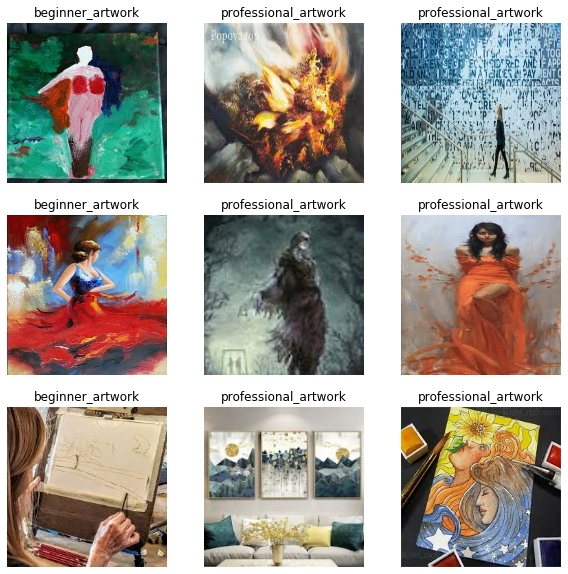

In [29]:
# Visualizing the first 9 images of the training set

class_names = train_data.class_names

plt.figure(figsize=(10, 10))

for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Creating a rescaling layer in order to scale input pixel values to a [0, 1] scale
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1. / 255)